#TASK 3 : To explore Unsupervised Machine Learning :

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Importing the dataset and required libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
data=pd.read_csv('/content/drive/My Drive/datasets/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#How the data poins are scattered : 
#Pairwise scatterplots :

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


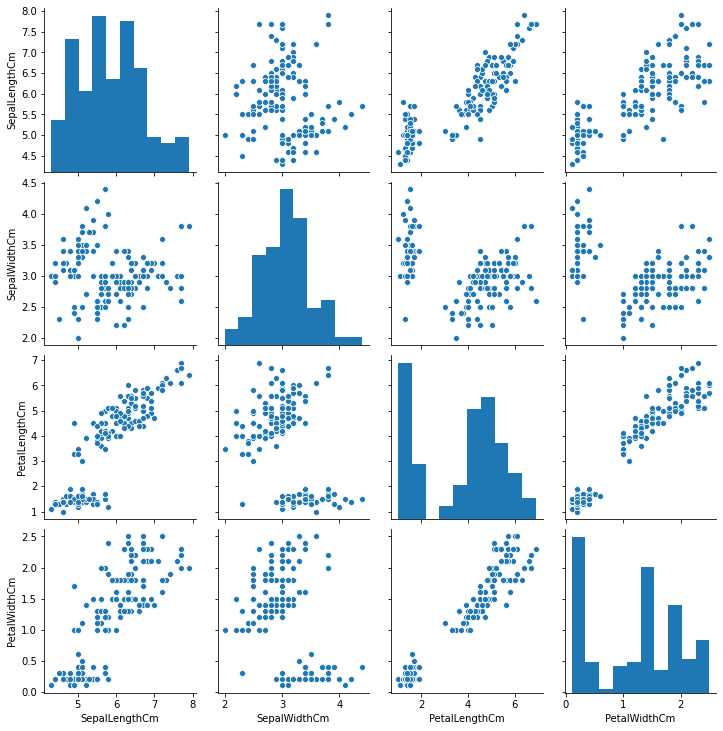

In [ ]:
import seaborn as sns
df=data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
sns.pairplot(df)
plt.show()

#Elbow method to find the optimal no. of clusters :

In [ ]:
SS_dist=[]
R = range(1,15)
for i in R:
  km = KMeans(n_clusters=i)
  km = km.fit(df)
  SS_dist.append(km.inertia_)

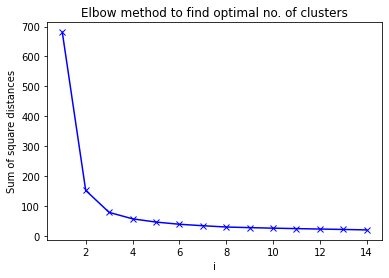

In [ ]:
plt.plot(R, SS_dist, 'bx-')
plt.xlabel('i')
plt.ylabel('Sum of square distances')
plt.title('Elbow method to find optimal no. of clusters')
plt.show()

#CONCLUSION : After i=3 the change in slope is linear. So, the optimal no. of clusters is 3

#Fitting KMeans model with 3 clusters :

In [ ]:
km3=KMeans(n_clusters=3)
km3=km3.fit(df)

In [ ]:
print(km3.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#How many observations are in each cluster :

In [ ]:
result=km3.labels_
result=pd.DataFrame(result, columns=['cluster'])
result.groupby('cluster').size()

cluster
0    62
1    50
2    38
dtype: int64

#The centroid of clusters:

In [ ]:
centroids = km3.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['Centroids_SepalLengthCm','Centroids_SepalWidthCm','Centroids_PetalLengthCm','Centroids_PetalWidthCm'])
centroids

,Centroids_SepalLengthCm,Centroids_SepalWidthCm,Centroids_PetalLengthCm,Centroids_PetalWidthCm
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


#Visualization of the clusters with centroids for each pair of input:

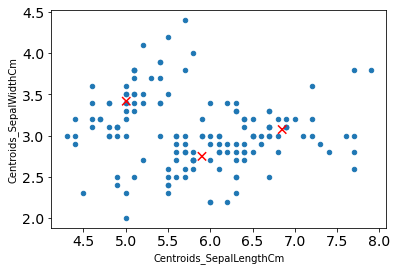

In [ ]:
s1=data.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')
centroids.plot(ax=s1, kind='scatter', x='Centroids_SepalLengthCm', y='Centroids_SepalWidthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()

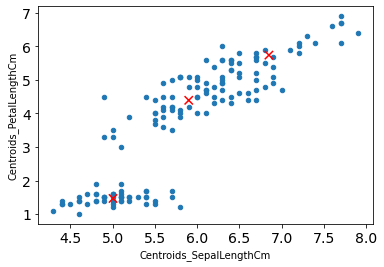

In [ ]:
s2=data.plot(kind='scatter', x='SepalLengthCm', y='PetalLengthCm')
centroids.plot(ax=s2, kind='scatter', x='Centroids_SepalLengthCm', y='Centroids_PetalLengthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()

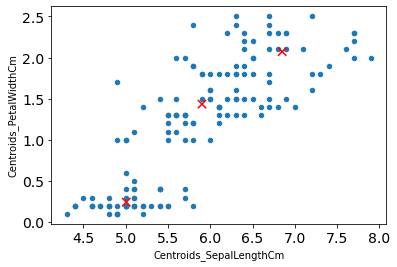

In [ ]:
s3=data.plot(kind='scatter', x='SepalLengthCm', y='PetalWidthCm')
centroids.plot(ax=s3, kind='scatter', x='Centroids_SepalLengthCm', y='Centroids_PetalWidthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()

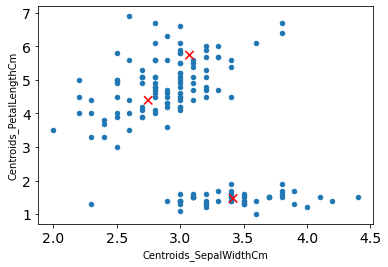

In [ ]:
s4=data.plot(kind='scatter', x='SepalWidthCm', y='PetalLengthCm')
centroids.plot(ax=s4, kind='scatter', x='Centroids_SepalWidthCm', y='Centroids_PetalLengthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()

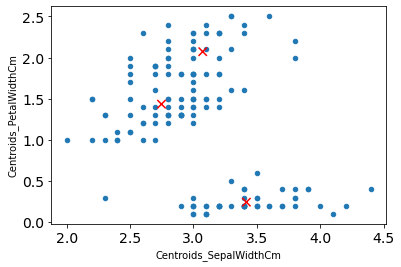

In [ ]:
s5=data.plot(kind='scatter', x='SepalWidthCm', y='PetalWidthCm')
centroids.plot(ax=s5, kind='scatter', x='Centroids_SepalWidthCm', y='Centroids_PetalWidthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()

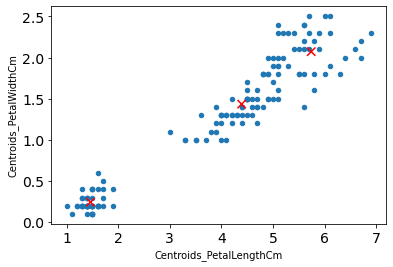

In [ ]:
s6=data.plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm')
centroids.plot(ax=s6, kind='scatter', x='Centroids_PetalLengthCm', y='Centroids_PetalWidthCm', color='red', fontsize=14, marker='x', s=[70,70,70])
plt.show()